In [1]:
# Import matplotlib
import matplotlib.pyplot as plt

# Other packages
import numpy as np
import xarray as xr

In [4]:
# Open our dataset
ds = xr.open_dataset("../data_samples/netcdf/E-OBS/UK_monthly.nc")

# Compute the climatology
climato = ds.mean("time")

## 2D plot types

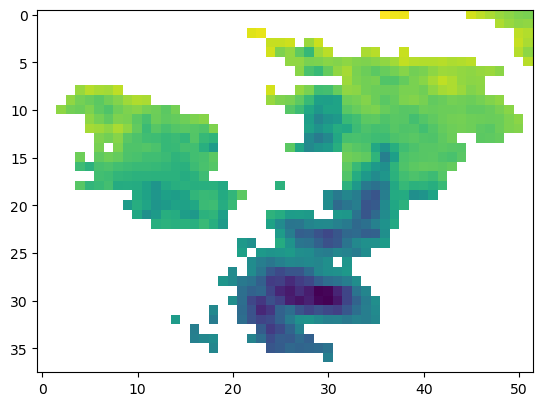

In [12]:
# matplotlib includes functions to plots 2D data
# imshow is the most basic one, displays the pixels in the 2D array
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
p = ax.imshow(climato.tg) # Plot the image

## Show
plt.show()

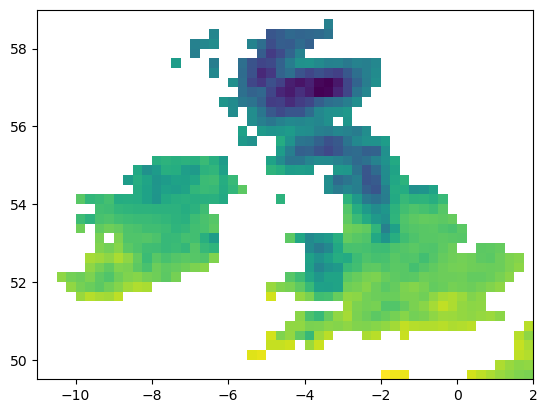

In [14]:
#pcolormesh is similar, but offers more flexibility
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
p = ax.pcolormesh(climato.longitude, climato.latitude,  # coordinates
                  climato.tg # 2D data
                 ) 

## Show
plt.show()

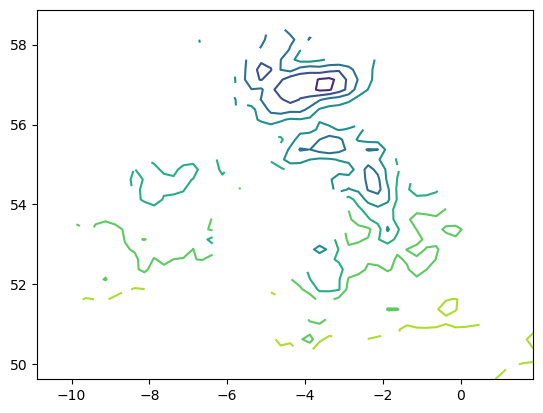

In [17]:
# Contours (not the best suited for this data with NaNs)
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
p = ax.contour(climato.longitude, climato.latitude,  # coordinates
                  climato.tg # 2D data
                 ) 

## Show
plt.show()

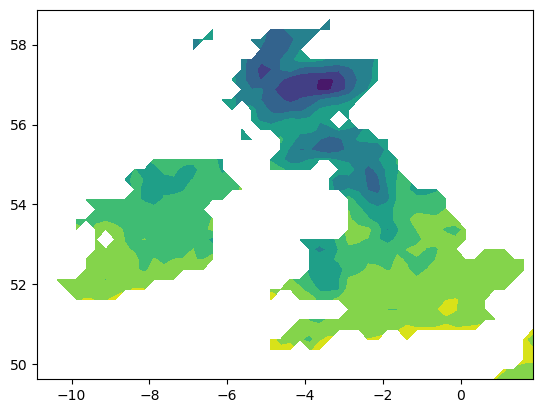

In [16]:
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
p = ax.contourf(climato.longitude, climato.latitude,  # coordinates
                  climato.tg # 2D data
                 ) 

## Show
plt.show()

In [19]:
# Add winds and show quiver and barbs and stream?

## Create a map with cartopy
cartopy allows to create maps with projections

In [20]:
# import cartopy crs
import cartopy.crs as ccrs

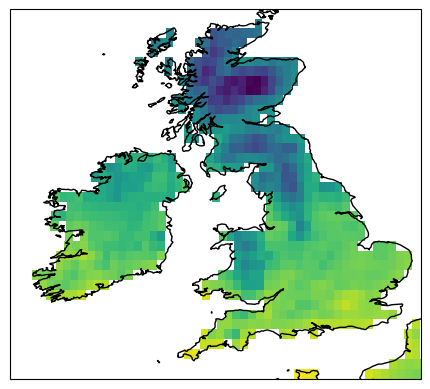

In [26]:
# Basic skeleton
## Setup the figure
fig = plt.figure() 
ax = plt.axes(projection = ccrs.Robinson()) # Add the projection in the axis creation

## Add the graphics
p = ax.pcolormesh(climato.longitude, climato.latitude, climato.tg,
                  transform = ccrs.PlateCarree(), # Add the transform in the plotting function
                 ) 

## Add the coastlines
ax.coastlines()

## Show
plt.show()

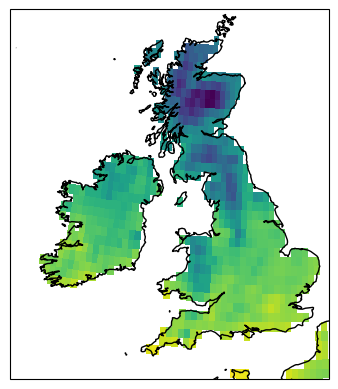

In [30]:
# Test other projections from https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
## Setup the figure
fig = plt.figure() 
ax = plt.axes(projection = ccrs.NorthPolarStereo()) # Add the projection in the axis creation

## Add the graphics
p = ax.pcolormesh(climato.longitude, climato.latitude, climato.tg,
                  transform = ccrs.PlateCarree(), # Add the transform in the plotting function
                 ) 

## Add the coastlines
ax.coastlines()

## Show
plt.show()

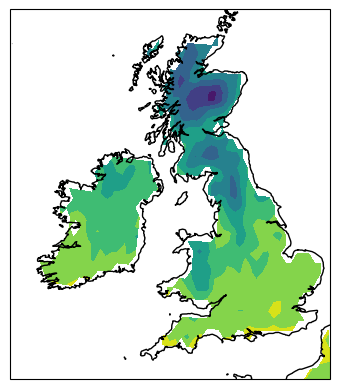

In [31]:
# You can then mix with different types of matplotlib plots
## Setup the figure
fig = plt.figure() 
ax = plt.axes(projection = ccrs.NorthPolarStereo()) # Add the projection in the axis creation

## Add the graphics
p = ax.contourf(climato.longitude, climato.latitude, climato.tg,
                  transform = ccrs.PlateCarree(), # Add the transform in the plotting function
                 ) 

## Add the coastlines
ax.coastlines()

## Show
plt.show()

## Plot customization

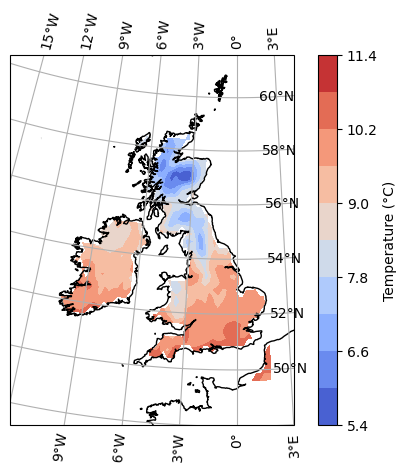

In [49]:
## Setup the figure
fig = plt.figure() 
ax = plt.axes(projection = ccrs.NorthPolarStereo()) 

## Add the graphics
p = ax.contourf(climato.longitude, climato.latitude, climato.tg,
                  transform = ccrs.PlateCarree(), 
                  cmap = "coolwarm", # Change colormap
                    levels = 10
                 ) 

## Add colorbar
plt.colorbar(p, 
             label = "Temperature (°C)" # Add colorbar label
            )

## cartopy customization
ax.coastlines() # Add coastlines
ax.gridlines( # Add latitude and longitude lines
    draw_labels=True,  # Write the labels
    )
ax.set_extent([-12, 3, 48, 61], crs=ccrs.PlateCarree()) # Change the limits of the displayed maps

## Show
plt.show()

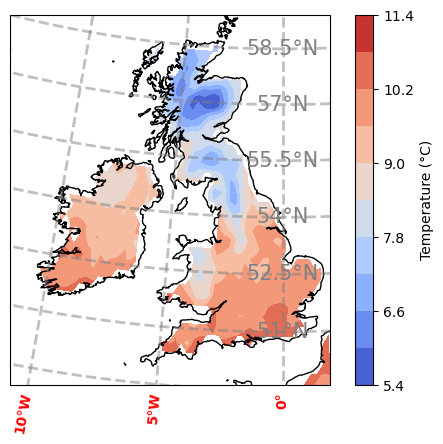

In [64]:
# Further customization of the gridlines
import matplotlib.ticker as mticker

## Setup the figure
fig = plt.figure() 
ax = plt.axes(projection = ccrs.NorthPolarStereo()) 

## Add the graphics
p = ax.contourf(climato.longitude, climato.latitude, climato.tg,
                  transform = ccrs.PlateCarree(), 
                  cmap = "coolwarm", 
                    levels = 10
                 ) 

## Add colorbar
plt.colorbar(p, 
             label = "Temperature (°C)",
            )

## cartopy customization
ax.coastlines() 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--', # Customize gridlines style
                 )
gl.top_labels = False # Hide longitude labels on top
gl.left_labels = False # Hide latitude labels on the left
gl.xlocator = mticker.FixedLocator([-10, -5, 0]) # Set position of longitude labels
gl.ylabel_style = {'size': 15, 'color': 'gray'} # Change the style of latitude labels
gl.xlabel_style = {'color': 'red', 'weight': 'bold'} # Change the style of longitude labels

## Show
plt.show()

/Users/bourdin/Softs/miniconda3/envs/spyder-env/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


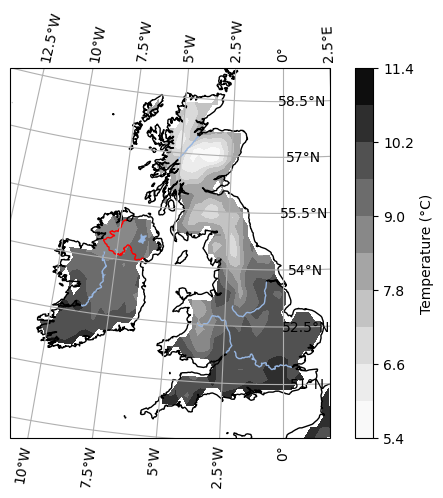

In [72]:
# Add pre-defined features
import cartopy.feature as cfeature

## Setup the figure
fig = plt.figure() 
ax = plt.axes(projection = ccrs.NorthPolarStereo()) 

## Add the graphics
p = ax.contourf(climato.longitude, climato.latitude, climato.tg,
                  transform = ccrs.PlateCarree(), 
                  cmap = "Greys", levels = 10
                 ) 

## Add colorbar
plt.colorbar(p, label = "Temperature (°C)",)

## cartopy customization
ax.coastlines() 
ax.gridlines(draw_labels=True,)

## FEATURES
ax.add_feature(cfeature.RIVERS,)
ax.add_feature(cfeature.LAKES,)
ax.add_feature(cfeature.BORDERS, color = "red")
    
## Show
plt.show()

In [1]:
# TODO: Use cartopy with xarray